# 1.유튜브 인기동영상 데이터

In [1]:
#데이터로드
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/youtube/youtube.csv")
df.head(4)

,Unnamed: 0,title,channelTitle,categoryId,view_count,likes,dislikes,comment_count,channelId,trending_date2
0,0,[신병] 물자창고,장삐쭈,23,1893473,38249,730,8595,UChbE5OZQ6dRHECsX0tEPEZQ,2021-01-01
1,1,RAIN(비) - 나로 바꾸자 Switch to me (duet with JYP) MV,RAIN's Official Channel,10,2600864,0,0,20129,UCxXgIeE5hxWxHG6dz9Scg2w,2021-01-01
2,2,2020년 제야의 종 온라인 타종행사 | 보신각 현장 행사는 진행하지 않습니다.,서울시 · Seoul,29,347049,3564,120,178,UCZUPZW5idAxYp-Asj__lVAA,2021-01-01
3,3,고기남자의 칠면조 파티,고기남자 MeatMan,26,528458,15372,280,3470,UCT3CumbFIJiW33uq0UI3zlg,2021-01-01


Q1.인기동영상 제작횟수가 많은 채널 상위 10개명을 출력하라 (날짜기준, 중복포함)



In [ ]:
Top_Channels = df['channelId'].value_counts().head(10).index
Top_Channels

Ans = df[df['channelId'].isin(Top_Channels)]['channelTitle'].unique().tolist()
Ans


#데이터마님답
# answer =list(df.loc[df.channelId.isin(df.channelId.value_counts().head(10).index)].channelTitle.unique())
# print(answer)
#df['channelId'].isin(Top_Channels)
# → channelId가 Top_Channels에 포함되는 행만 True로 표시합니다.
# df[...]
# → 위 조건에 맞는 행만 필터링합니다.
# ['channelTitle']
# → 그 필터링된 행들에서 channelTitle 열만 선택합니다.

# .unique()
# → 중복을 제거하고 유일한 값들만 남깁니다.

# .tolist()
# → 최종 결과를 리스트로 바꿉니다.

['장삐쭈',
 '총몇명',
 '파뿌리',
 '짤툰',
 '런닝맨 - 스브스 공식 채널',
 '엠뚜루마뚜루 : MBC 공식 종합 채널',
 'SPOTV',
 '채널 십오야',
 '이과장',
 'BANGTANTV']

Q2.논란으로 인기동영상이 된 케이스를 확인하고 싶다. dislikes수가 like 수보다 높은 동영상을 제작한 채널을 모두 출력하라

In [ ]:
list(df.loc[df['likes'] < df['dislikes']].channelTitle.unique())

['핫도그TV',
 'ASMR 애정TV',
 '하얀트리HayanTree',
 '양팡 YangPang',
 '철구형 (CHULTUBE)',
 '왜냐맨하우스',
 '(MUTUBE)와꾸대장봉준',
 '오메킴TV',
 '육지담',
 'MapleStory_KR',
 'ROAD FIGHTING CHAMPIONSHIP',
 '사나이 김기훈',
 '나혼자산다 STUDIO',
 'Gen.G esports']

Q3.채널명을 바꾼 케이스가 있는지 확인하고 싶다. channelId의 경우 고유값이므로 이를 통해 채널명을 한번이라도 바꾼 채널의 갯수를 구하여라

In [ ]:
# 채널아이디와 채널명이 달라진 경우
change = df[['channelTitle','channelId']].drop_duplicates().channelId.value_counts()
target = change[change>1]
print(len(target))

71


Q4.일요일에 인기있었던 영상들중 가장많은 영상 종류(categoryId)는 무엇인가?

In [ ]:
df.head(3)
df['trending_date2'] = pd.to_datetime(df['trending_date2'])
Ans = df.loc[df['trending_date2'].dt.day_name() =='Sunday'].categoryId.value_counts().index[0]
print(Ans)


#index[0]의 의미:
# value_counts()는 categoryId 값별로 **빈도 수(출현 횟수)**를 세어서 많이 나온 순서대로 정렬한 시리즈를 만듭니다.

# 그 시리즈의 .index는 카테고리 ID들(예: 10, 22, 24 등)만 뽑아온 것입니다.

# .index[0]은 가장 많이 등장한 categoryId를 의미합니다.

# 쉽게 말하면:
# "일요일에 가장 많이 등장한 categoryId는 뭐야?"에 대한 답을 구하는 코드입니다.

24


Q5.각 요일별 인기 영상들의 categoryId는 각각 몇개 씩인지 하나의 데이터 프레임으로 표현하라



In [ ]:
group = df.groupby([df['trending_date2'].dt.day_name(), df['categoryId']],as_index=False).size()
#group
Ans = group.pivot(index='categoryId', columns='trending_date2')
print(Ans)

                 size                                                  
trending_date2 Friday Monday Saturday Sunday Thursday Tuesday Wednesday
categoryId                                                             
1                 243    263      255    274      246     257       234
2                 120    105      119     99      128     119       129
10                833    837      776    830      890     894       917
15                187    215      198    217      207     208       207
17                633    668      592    636      682     708       706
19                 90     92       87     91       92      89        85
20                283    298      296    289      282     285       291
22               1288   1373     1289   1337     1341    1375      1333
23                568    594      570    556      560     569       566
24               2976   3148     3066   3096     2954    3084      3090
25                444    453      422    437      470     452   

Q6.댓글의 수로 (comment_count) 영상 반응에 대한 판단을 할 수 있다. viewcount대비 댓글수가 가장 높은 영상을 확인하라 (view_count값이 0인 경우는 제외한다)





In [7]:
target2 = df.loc[df['view_count']!=0]
t = target2.copy()
t
t['ratio'] = (target2['comment_count'] / target2['view_count']).dropna()
t['ratio']
result = t.sort_values(by='ratio', ascending=False).iloc[0].title
print(result)

#다른풀이
# result = df[df['view_count'] != 0].assign(
#     ratio=lambda x: x['comment_count'] / x['view_count']
# ).sort_values('ratio', ascending=False).iloc[0]['title']

# print(result)

60분 동안 댓글이 달리지 않으면, 영상이 삭제됩니다. (챌린지)


Q7.댓글의 수로 (comment_count) 영상 반응에 대한 판단을 할 수 있다.viewcount대비 댓글수가 가장 낮은 영상을 확인하라 (view_counts, ratio값이 0인경우는 제외한다.)

In [ ]:
df.head(2)
ratio = (df['comment_count'] / df['view_count']).dropna().sort_values()
ratio[ratio!=0].index[0]

result = df.iloc[ratio[ratio!=0].index[0]].title
print(result)



Join the BTS #PermissiontoDance Challenge only on YouTube #Shorts


Q8.like 대비 dislike의 수가 가장 적은 영상은 무엇인가? (like, dislike 값이 0인경우는 제외한다)

※assign함수 (새로운 파생변수등 만들때 주로사용)
df.assign(새컬럼이름=계산식)
df.assign(c=lambda x: x['b'] / x['a'])

※여러개 생성 가능
df.assign(
    c=lambda x: x['b'] / x['a'],
    d=lambda x: x['a'] + x['b']
)

In [ ]:
#데이터 마님 풀이
target = df.loc[(df.likes !=0) & (df.dislikes !=0)]
num =(target['dislikes'] / target['likes']).sort_values().index[0]

Ans = df.iloc[num].title
print(Ans)

#간단 코드
Ans2 = target. assign(ratio = target['dislikes'] / target['likes']).sort_values('ratio', ascending=True).iloc[0]['title']
print(Ans2)

[줌터뷰] *최초공개* 사부작즈🐰🐶의 비공식 이름은 아이라인즈? 꿀조합 티키타카 가득한 NCT 127 도영&정우의 줌터뷰
[줌터뷰] *최초공개* 사부작즈🐰🐶의 비공식 이름은 아이라인즈? 꿀조합 티키타카 가득한 NCT 127 도영&정우의 줌터뷰


In [ ]:
target. assign(ratio = target['dislikes'] / target['likes']).sort_values('ratio', ascending=True).reset_index(drop=True)

,Unnamed: 0,title,channelTitle,categoryId,view_count,likes,dislikes,comment_count,channelId,trending_date2,ratio
0,11477,[줌터뷰] *최초공개* 사부작즈🐰🐶의 비공식 이름은 아이라인즈? 꿀조합 티키타카 가...,CosmopolitanKorea,26,122354,19104,10,851,UCVWr5QkOkYupX6fEELMNvuQ,2021-02-27,0.000523
1,12168,[줌터뷰] *최초공개* 사부작즈🐰🐶의 비공식 이름은 아이라인즈? 꿀조합 티키타카 가...,CosmopolitanKorea,26,153685,23404,14,951,UCVWr5QkOkYupX6fEELMNvuQ,2021-03-02,0.000598
2,11969,[줌터뷰] *최초공개* 사부작즈🐰🐶의 비공식 이름은 아이라인즈? 꿀조합 티키타카 가...,CosmopolitanKorea,26,152823,23271,14,951,UCVWr5QkOkYupX6fEELMNvuQ,2021-03-02,0.000602
3,11740,[줌터뷰] *최초공개* 사부작즈🐰🐶의 비공식 이름은 아이라인즈? 꿀조합 티키타카 가...,CosmopolitanKorea,26,147785,22591,14,935,UCVWr5QkOkYupX6fEELMNvuQ,2021-03-01,0.000620
4,12386,[줌터뷰] *최초공개* 사부작즈🐰🐶의 비공식 이름은 아이라인즈? 꿀조합 티키타카 가...,CosmopolitanKorea,26,157456,23943,15,960,UCVWr5QkOkYupX6fEELMNvuQ,2021-03-03,0.000626
...,...,...,...,...,...,...,...,...,...,...,...
59688,26887,죄송합니다.,오메킴TV,20,675915,1201,15202,7658,UCeudxdJJ4VtlP43Pv9l7f-A,2021-05-15,12.657785
59689,27108,죄송합니다.,오메킴TV,20,686392,1208,15471,7757,UCeudxdJJ4VtlP43Pv9l7f-A,2021-05-16,12.807119
59690,27355,죄송합니다.,오메킴TV,20,695010,1212,15679,7837,UCeudxdJJ4VtlP43Pv9l7f-A,2021-05-17,12.936469
59691,27578,죄송합니다.,오메킴TV,20,701326,1216,15820,7838,UCeudxdJJ4VtlP43Pv9l7f-A,2021-05-18,13.009868


In [ ]:
target.assign(
              ratio =  lambda x : x['dislikes'] / x['likes'],
              더하기 = lambda x : x['dislikes'] + x['likes'],
              빼기   = lambda x : x['dislikes'] - x['likes'],
              곱하기 = lambda x : x['dislikes'] * x['likes']
              ).sort_values('빼기', ascending=False).reset_index(drop=True)

,Unnamed: 0,title,channelTitle,categoryId,view_count,likes,dislikes,comment_count,channelId,trending_date2,ratio,더하기,빼기,곱하기
0,28482,"'전기'한테 한마디 하는 육지담,머니게임 리뷰 [육지담]",육지담,22,2341851,4917,50980,20702,UC-swYD-2HDI8__JkO6QKc3w,2021-05-23,10.368111,55897,46063,250668660
1,28261,"'전기'한테 한마디 하는 육지담,머니게임 리뷰 [육지담]",육지담,22,2273639,4779,48881,20186,UC-swYD-2HDI8__JkO6QKc3w,2021-05-22,10.228290,53660,44102,233602299
2,27991,죄송합니다,(MUTUBE)와꾸대장봉준,23,2240942,4331,48246,30958,UC69uMhRJcUnvMnMxKT2SS0w,2021-05-20,11.139691,52577,43915,208953426
3,27773,죄송합니다,(MUTUBE)와꾸대장봉준,23,2216621,4316,47830,30802,UC69uMhRJcUnvMnMxKT2SS0w,2021-05-19,11.082020,52146,43514,206434280
4,27561,죄송합니다,(MUTUBE)와꾸대장봉준,23,2185705,4282,47172,30473,UC69uMhRJcUnvMnMxKT2SS0w,2021-05-18,11.016348,51454,42890,201990504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59688,29729,BTS (방탄소년단) 'Butter' Official MV,HYBE LABELS,10,282265069,16272565,168794,6845770,UC3IZKseVpdzPSBaWxBxundA,2021-06-02,0.010373,16441359,-16103771,2746711336610
59689,29964,BTS (방탄소년단) 'Butter' Official MV,HYBE LABELS,10,285698612,16319755,172331,6864694,UC3IZKseVpdzPSBaWxBxundA,2021-06-02,0.010560,16492086,-16147424,2812399698905
59690,30174,BTS (방탄소년단) 'Butter' Official MV,HYBE LABELS,10,289350312,16369715,175204,6889393,UC3IZKseVpdzPSBaWxBxundA,2021-06-03,0.010703,16544919,-16194511,2868039546860
59691,30383,BTS (방탄소년단) 'Butter' Official MV,HYBE LABELS,10,292502967,16413537,178381,6913277,UC3IZKseVpdzPSBaWxBxundA,2021-06-03,0.010868,16591918,-16235156,2927863143597


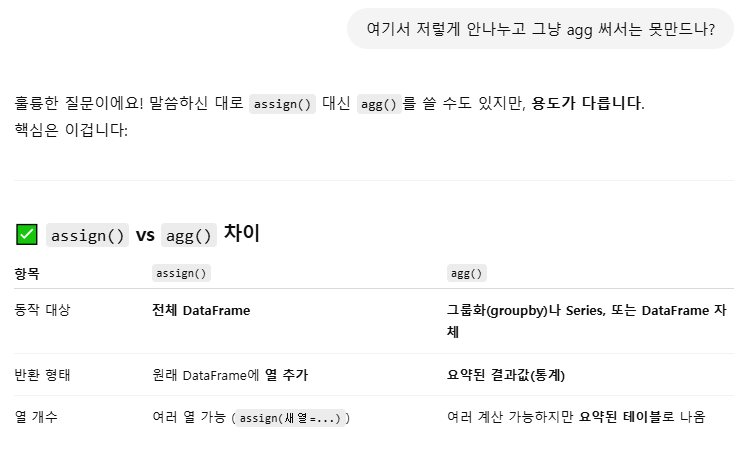

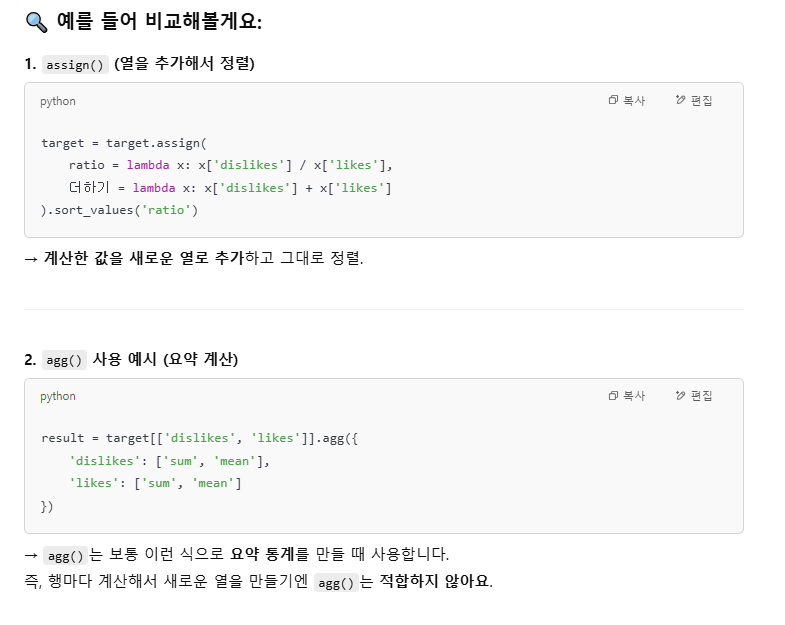

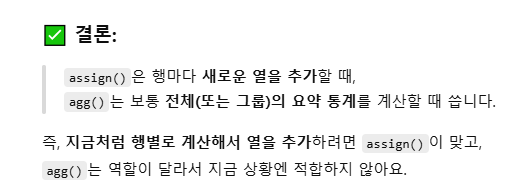

Q9.가장많은 트렌드 영상을 제작한 채널의 이름은 무엇인가? (날짜기준, 중복포함)

※주의
1. sort_values()는 기본 오름차순이라 index[0]이 가장작은값

but

2. value_counts()는 기본적으로 내림차순이라 index[0]이 가장 큰값으로 나옴!

idxmax()는 Pandas에서 Series나 DataFrame의 최대값이 위치한 인덱스를 반환하는 함수입니다.

예를 들어, 어떤 열(column)에서 가장 큰 값이 있는 행의 인덱스를 알고 싶을 때 사용합니다.



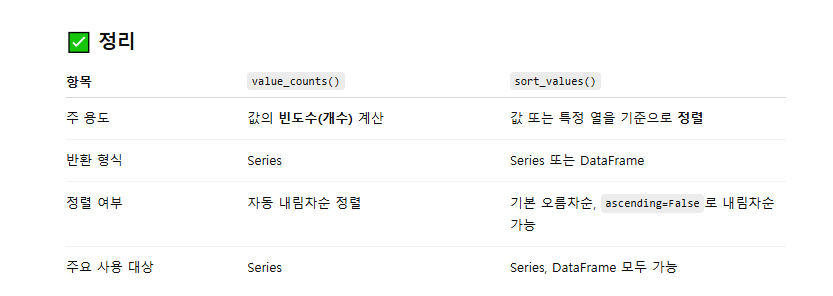

In [ ]:
df.dtypes

,0
Unnamed: 0,int64
title,object
channelTitle,object
categoryId,int64
view_count,int64
likes,int64
dislikes,int64
comment_count,int64
channelId,object
trending_date2,datetime64[ns]


In [ ]:
df.head(2)

,Unnamed: 0,title,channelTitle,categoryId,view_count,likes,dislikes,comment_count,channelId,trending_date2
0,0,[신병] 물자창고,장삐쭈,23,1893473,38249,730,8595,UChbE5OZQ6dRHECsX0tEPEZQ,2021-01-01
1,1,RAIN(비) - 나로 바꾸자 Switch to me (duet with JYP) MV,RAIN's Official Channel,10,2600864,0,0,20129,UCxXgIeE5hxWxHG6dz9Scg2w,2021-01-01


In [ ]:
# df.dtypes
# df.head(2)
df['trending_date2'] = pd.to_datetime(df['trending_date2'])
Ans =df.loc[df['channelId'] == df['channelId'].value_counts().index[0]].channelTitle.unique()[0]
print(Ans)

# df['channelId'].value_counts().index[0]
# → 가장 많이 등장한 channelId를 구함 (트렌드 영상 수 기준)

#index[0]은 value_counts로 구한 결과중 가장많은 값(즉1등값)을 가져온다

# df.loc[df['channelId'] == (가장 많은 채널ID)]
# → 그 채널의 모든 row를 필터링

# .channelTitle.unique()[0]
# → 해당 채널의 제목을 중복 없이 가져옴 (하나만 있으니까 [0]으로 꺼냄)

#다른 풀이
df['trending_date2'] = pd.to_datetime(df['trending_date2'])
top_channel_id = df['channelId'].value_counts().idxmax()
Ans = df.loc[df['channelId'] == top_channel_id, 'channelTitle'].iloc[0]
print(Ans)

짤툰
짤툰


In [ ]:
Ans = df.loc[df['channelId'] == top_channel_id, 'channelTitle'].value_counts()
print(Ans)

channelTitle
짤툰    372
Name: count, dtype: int64


Q.10 20회(20일)이상 인기동영상 리스트에 포함된 동영상의 숫자는?



In [ ]:
Ans = (df[['title', 'channelTitle']].value_counts() >=20).sum()
print(Ans)

40


In [ ]:
df.head(0)

,Unnamed: 0,title,channelTitle,categoryId,view_count,likes,dislikes,comment_count,channelId,trending_date2


# 유튜브 공범컨텐츠 동영상 데이터
데이터 설명 : 유튜브 “공범” 컨텐츠 동영상 정보 ( 10분 간격 수집)
비디오 정보 & 참가자 채널정보

In [ ]:
import pandas as pd


channel =pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/youtube/channelInfo.csv')
video =pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/youtube/videoInfo.csv')
display(channel.head())
display(video.head())

,channelid,subcnt,viewcnt,videocnt,ct,channelname
0,UCkQCwnkQfgSuPTTnw_Y7v7w,1310000,410238653,736,2021-09-30 03:01:03,꽈뚜룹
1,UCkQCwnkQfgSuPTTnw_Y7v7w,1310000,412531322,736,2021-09-30 09:01:03,꽈뚜룹
2,UCkQCwnkQfgSuPTTnw_Y7v7w,1310000,412531322,735,2021-09-30 15:01:03,꽈뚜룹
3,UCkQCwnkQfgSuPTTnw_Y7v7w,1310000,412531322,737,2021-09-30 21:01:03,꽈뚜룹
4,UCkQCwnkQfgSuPTTnw_Y7v7w,1320000,412531322,737,2021-10-01 03:01:04,꽈뚜룹


,videopk,viewcnt,likecnt,dislikecnt,favoritecnt,cmcnt,ct,videoname
0,c5JQp6xafqc,1667010,30474,706,0,6587,2021-10-10 15:20:03,공범 EP1
1,c5JQp6xafqc,1669089,30495,707,0,6589,2021-10-10 15:30:03,공범 EP1
2,c5JQp6xafqc,1674759,30522,711,0,6596,2021-10-10 15:40:02,공범 EP1
3,c5JQp6xafqc,1677026,30555,712,0,6604,2021-10-10 15:50:03,공범 EP1
4,c5JQp6xafqc,1681824,30585,713,0,6600,2021-10-10 16:00:03,공범 EP1


Q11. 각 데이터의 ‘ct’컬럼을 시간으로 인식할수 있게 datatype을 변경하고 video 데이터의 videoname의 각 value 마다 몇개의 데이터씩 가지고 있는지 확인하라

In [ ]:
channel['ct'] = pd.to_datetime(channel['ct'])
video['ct'] = pd.to_datetime(video['ct'])

video['videoname'].value_counts()


,count
videoname,
공범 EP1,3492
공범 EP2,3204
공범 EP3,2568
공범 EP4,2280
공범 EP5,1562
공범 EP6,1274
공범 EP7,555
공범 EP8,266


Q.12 수집된 각 video의 가장 최신화 된 날짜의 viewcount값을 출력하라

In [ ]:
video.sort_values(['videoname', 'ct']).drop_duplicates('videoname', keep='last')[['viewcnt', 'videoname','ct']].reset_index(drop=True)

,viewcnt,videoname,ct
0,3180532,공범 EP1,2021-11-01 15:30:03
1,2199328,공범 EP2,2021-11-01 15:30:03
2,1671294,공범 EP3,2021-11-01 15:30:03
3,1818493,공범 EP4,2021-11-01 15:30:03
4,1503435,공범 EP5,2021-11-01 15:30:04
5,1750222,공범 EP6,2021-11-01 15:30:04
6,1630200,공범 EP7,2021-11-01 15:30:05
7,1289088,공범 EP8,2021-11-01 15:30:05


Q13.Channel 데이터중 2021-10-03일 이후 각 채널의 처음 기록 됐던 구독자 수(subcnt)를 출력하라

In [8]:
channel.head()
channel['ct'] = pd.to_datetime(channel['ct'])
target = channel[channel['ct'] >= pd.to_datetime('2021-10-03')].sort_values(['ct', 'channelname']).drop_duplicates('channelname')
answer = target[['channelname', 'subcnt']].reset_index(drop=True)
print(answer)

NameError: name 'channel' is not defined

In [ ]:
channel['ct'] = pd.to_datetime(channel['ct'])
target = channel[channel['ct'] >= pd.to_datetime("2021-10-03")].sort_values(['ct','channelname']).drop_duplicates('channelname')
target[['subcnt','viewcnt','channelname']].reset_index(drop=True)

Q14.각채널의 2021-10-03 03:00:00 ~ 2021-11-01 15:00:00 까지 구독자수 (subcnt) 의 증가량을 구하여라

strftime = String Format Time 으로 날짜와 시간을 문자열로 포멧팅 할 떄 사용하는 함수

In [ ]:
start = channel.loc[channel['ct'].dt.strftime('%Y-%m-%d %H') =='2021-10-03 03']
print(start)
end = channel.loc[channel['ct'].dt.strftime('%Y-%m-%d %H') == '2021-11-01 15']
print(end)

start_df = start[['channelname', 'subcnt']].reset_index(drop=True)
end_df = end[['channelname', 'subcnt']].reset_index(drop=True)

print(start_df)
print(end_df)

start_df.columns = ['channelname','start_sub']
end_df.columns= ['channelname', 'end_sub']

print(start_df_columns)
print(end_df_columns)

tt= pd.merge(start_df,end_df)
tt['del'] = tt['end_sub'] - tt['start_sub']
result = tt[['channelname', 'del']]
print(result)


Q.15 각 비디오는 10분 간격으로 구독자수, 좋아요, 싫어요수, 댓글수가 수집된것으로 알려졌다. 공범 EP1의 비디오정보 데이터중 수집간격이 5분 이하, 20분이상인 데이터 구간( 해당 시점 전,후) 의 시각을 모두 출력하라



In [ ]:
import datetime
video['ct'] = pd.to_datetime(video['ct'])

ep_one = video.loc[video.videoname.str.contains('1')].sort_values('ct').reset_index(drop=True)

ep_one[
        (ep_one.ct.diff(1) >=datetime.timedelta(minutes=20)) | \
        (ep_one.ct.diff(1) <=datetime.timedelta(minutes=5))

      ]

#해당시점 전후 모두 춮력하라했으니 위에 ep_one에서 나온것들의 ->721,722,1636 전후 index를 뽑아서 진행
#즉 720 721 722,723,  1635 1636 1637
answer = ep_one[ep_one.index.isin([720,721,722,723,1635,1636,1637])]
display(answer)

Q16.각 에피소드의 시작날짜(년-월-일)를 에피소드 이름과 묶어 데이터 프레임으로 만들고 출력하라

In [ ]:
start_date = video.sort_values(['ct','videoname']).drop_duplicates('videoname')[['ct','videoname']]
start_date['date'] = start_date.ct.dt.date
answer = start_date[['date','videoname']]
display(answer)

In [ ]:
start_date = video.sort_values(['videoname', 'ct']).drop_duplicates('videoname')[['ct',videoname']]

start_date['date'] = start_date['ct'].dt.date
start_date[['date', 'videoname']]

In [ ]:
#시작날짜는 오름차순으로 놓고 중복 제거하면 가장 윗값이 남기때문에, sort_values하면 오름차순이 되니 이게 시작 날짜가 조회가 됨!
start_date = video.sort_values(['videoname','ct']).drop_duplicates('videoname')[['ct','videoname']]
print(start_date)

#date라는 새로운 칼럼 생성
start_date['date'] = start_date['ct'].dt.date

answer = start_date[['date','videoname']]
display(answer)

Q17.“공범” 컨텐츠의 경우 19:00시에 공개 되는것으로 알려져있다. 공개된 날의 21시의 viewcnt, ct, videoname 으로 구성된 데이터 프레임을 viewcnt를 내림차순으로 정렬하여 출력하라

In [ ]:
video['ct'] = pd.to_datetime(video['ct'])
video['time']= video['ct'].dt.hour

answer = video.loc[video['time'] ==21] \
            .sort_values(['videoname','ct'])\
            .drop_duplicates('videoname')\
            .sort_values('viewcnt',ascending=False)[['videoname','viewcnt','ct']]\
            .reset_index(drop=True)

display(answer)

Q18.video 정보의 가장 최근 데이터들에서 각 에피소드의 싫어요/좋아요 비율을 ratio 컬럼으로 만들고 videoname, ratio로 구성된 데이터 프레임을 ratio를 오름차순으로 정렬하라

In [ ]:
#ct에서 비디오네임 중복을 제거하고 가장 마지막 꺼를 가져오는걸 타겟으로 한다
target = video.sort_values('ct').drop_duplicates('videoname', keep='last')
print(target)
target['ratio'] = target['dislikecnt'] / target['likecnt']

answer = target.sort_values('ratio')[['videoname', 'ratio']].reset_index(drop=True)
print(answer)

# video['ratio'] = video['dislikecnt'] / video['likecnt']

# video.groupby(video[['videoname', 'ratio']]).sort_values('ratio', ascending= True)

Q19.
2021-11-01 00:00:00 ~ 15:00:00까지 각 에피소드별 viewcnt의 증가량을 데이터 프레임으로 만드시오

In [ ]:
video['ct'] = pd.to_datetime(video['ct'])

start = pd.to_datetime("2021-11-01 00:00:00")
end   = pd.to_datetime("2021-11-01 15:00:00")

target = video.loc[(video['ct'] >= start) * (video['ct'] <= end)].reset_index(drop=True)
print(target)

def check(x) :
  result = max(x) - min(x)
  return result

answer = target[['videoname', 'viewcnt']].groupby('videoname').agg(check)
answer

Q20.
video 데이터 중에서 중복되는 데이터가 존재한다. 중복되는 각 데이터의 시간대와 videoname 을 구하여라

In [ ]:
#전체 인덱스 값 - 중복을 제거한(고유한)인덱스만  = 고유값들은 전부 사라질테니 중복값만 남는다

answer = video[video.index.isin(set(video.index) - set(video.drop_duplicates().index))]
result = answer[['videoname', 'ct']]
display(result)

#두번쨰 방법 : 저렇게 수식하지 않고 중복된 시간대와 네임을 모두 보고싶으면 둘다 나오게 하면됨
answer = video[video.duplicated(keep=False)][['videoname', 'ct']]
print(answer)


In [ ]:
answer = video[video.duplicated(keep=False)][['videoname', 'ct']]
print(answer)

# 월드컵 출전선수 골기록 데이터

In [ ]:
#데이터로드
import pandas as pd

df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/worldcup/worldcupgoals.csv')
df.head()

,Player,Goals,Years,Country
0,Miroslav Klose,16,2002-2006-2010-2014,Germany
1,Ronaldo,15,1998-2002-2006,Brazil
2,Gerd Muller,14,1970-1974,Germany
3,Just Fontaine,13,1958,France
4,Pele,12,1958-1962-1966-1970,Brazil


Q21.
주어진 전체 기간의 각 나라별 골득점수 상위 5개 국가와 그 득점수를 데이터프레임형태로 출력하라

In [ ]:
result = df.groupby('Country').sum().sort_values('Goals',ascending=False).head(5)
display(result)

,Player,Goals,Years
Country,,,
Brazil,RonaldoPeleAdemirJairzinhoVavaLeonidasRivaldoC...,228,1998-2002-20061958-1962-1966-197019501966-1970...
Germany,Miroslav KloseGerd MullerJurgen KlinsmannThoma...,226,2002-2006-2010-20141970-19741990-1994-19982010...
Argentina,Gabriel BatistutaDiego MaradonaGuillermo Stabi...,135,1994-1998-20021982-1986-1990-199419301974-1978...
Italy,Roberto BaggioPaolo RossiChristian VieriSalvat...,123,1990-1994-19981978-19821998-2002199019381982-1...
France,Just FontaineThierry HenryMichel PlatiniZinedi...,115,19581998-2002-2006-20101978-1982-19861998-2002...


Q22.
주어진 전체기간동안 골득점을 한 선수가 가장 많은 나라 상위 5개 국가와 그 선수 숫자를 데이터 프레임 형식으로 출력하라

In [ ]:
# 각 그룹(나라)마다 몇개의 행이 있는지를 세면됨 but 행들자체가 골넣은 선수들로 이루어진 DataFrame이라는 전제임!)
result = df.groupby('Country').size().sort_values(ascending=False).head(5)
display(result)

,0
Country,
Brazil,81
Germany,78
Italy,60
Argentina,59
France,58


Q23.Years 컬럼은 년도 -년도 형식으로 구성되어있고, 각 년도는 4자리 숫자이다. 년도 표기가 4자리 숫자로 안된 케이스가 존재한다. 해당 건은 몇건인지 출력하라

In [ ]:
df['yearLst'] = df.Years.str.split('-')

def checkFour(x):
    for value in x:
        if len(str(value)) != 4:
            return False

    return True

df['check'] = df['yearLst'].apply(checkFour)

result = len(df[df.check ==False])
result

# Years 열은 "2021_2022_2023"처럼 밑줄로 구분된 연도 문자열이 들어 있다고 가정합니다.

# 이 줄은 Years 값을 _ 기준으로 나누어 리스트로 바꿉니다.

# 예: "2021_2022" → ['2021', '2022']


45

Q.24  
**Q23에서 발생한 예외 케이스를 제외한 데이터프레임을 df2라고 정의하고 데이터의 행의 숫자를 출력하라 (아래 문제부터는 df2로 풀이하겠습니다) **




In [ ]:
df2 = df[df['check'] ==True].reset_index(drop=True)
print(df2.shape[0])

1250


Q25.
월드컵 출전횟수를 나타내는 ‘LenCup’ 컬럼을 추가하고 4회 출전한 선수의 숫자를 구하여라

In [ ]:
df2['LenCup'] =df2['yearLst'].str.len()
result = df2['LenCup'].value_counts()[4]
print(result)

# df2['LenCup'].value_counts()

16


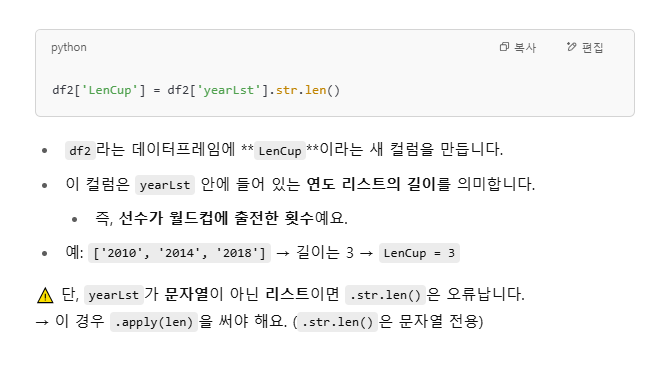

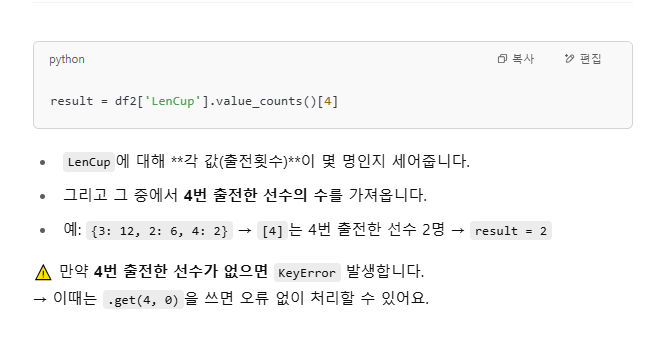

Q26.
Yugoslavia 국가의 월드컵 출전횟수가 2회인 선수들의 숫자를 구하여라


In [ ]:
result = len(df2[(df2['LenCup'] ==2) & (df2['Country'] == 'Yugoslavia')])
print(result)

7


Q27.
2002년도에 출전한 전체 선수는 몇명인가?

In [ ]:
result = len(df2[df2['Years'].str.contains('2002')])
print(result)

156


Q28.이름에 ‘carlos’ 단어가 들어가는 선수의 숫자는 몇 명인가? (대, 소문자 구분 x)

In [ ]:
# print(df2.head())
len(df2[df2['Player'].str.lower().str.contains('carlos')])

len(df2[df2['Player'].str.upper().str.contains('CARLOS')])

13

Q29. 월드컵 출전 횟수가 1회뿐인 선수들 중에서 가장 많은 득점을 올렸던 선수는 누구인가?

In [ ]:
df2[df2['LenCup'] == 1].sort_values('Goals', ascending=False).Player.values[0]


# df2[['Player', 'Goals']].sort_values('Player',ascending=False)[only_one]

'Just Fontaine'

Q30.월드컵 출전횟수가 1회 뿐인 선수들이 가장 많은 국가는 어디인가?

In [ ]:
result= df2[df2.LenCup==1]['Country'].value_counts().index[0]
print(result)
#LenCup == 1인 선수들 중에서,

# 가장 많이 나온 **국가(Country)**를 세서,

# 그 중 가장 많은 빈도를 가진 국가의 이름을 반환.

Brazil


# 서울시 따릉이 이용정보 데이터

In [ ]:
import pandas as pd
df =pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/bicycle/seoul_bi.csv')
df.head()

,대여일자,대여시간,대여소번호,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2021-06-01,0,3541,정기권,F,~10대,1,0.00,0.00,0.00,8
1,2021-06-01,0,765,정기권,F,~10대,1,27.21,0.35,1526.81,19
2,2021-06-01,0,2637,정기권,F,~10대,1,41.40,0.37,1608.56,18
3,2021-06-01,0,2919,정기권,F,~10대,1,0.00,0.00,0.00,75
4,2021-06-01,0,549,정기권,F,~10대,1,13.04,0.17,731.55,6


Q31.대여일자별 데이터의 수를 데이터프레임으로 출력하고, 가장 많은 데이터가 있는 날짜를 출력하라

In [ ]:
result = df['대여일자'].value_counts().sort_index().to_frame()
df['대여일자'].value_counts().index[0]

'2021-06-04'

Q32.각 일자의 요일을 표기하고 (‘Monday’ ~’Sunday’) ‘day_name’컬럼을 추가하고 이를 이용하여 각 요일별 이용 횟수의 총합을 데이터 프레임으로 출력하라

In [ ]:
import pandas as pd
df['대여일자'] = pd.to_datetime(df['대여일자'])
df['day_name'] = df['대여일자'].dt.day_name()
df['day_name'].value_counts().to_frame()

,count
day_name,
Wednesday,110607
Friday,108877
Monday,107568
Tuesday,103704
Saturday,101299
Sunday,90918
Thursday,55977


Q33.각 요일별 가장 많이 이용한 대여소의 이용횟수와 대여소 번호를 데이터 프레임으로 출력하라

In [ ]:
result = df.groupby(['day_name','대여소번호']).size().to_frame('size').sort_values(['day_name', 'size'], ascending=False).reset_index()
result.drop_duplicates('day_name', keep='first').reset_index(drop=True)

,day_name,대여소번호,size
0,Wednesday,502,282
1,Tuesday,502,267
2,Thursday,2715,137
3,Sunday,502,372
4,Saturday,502,378
5,Monday,502,242
6,Friday,502,277


Q34.나이대별 대여구분 코드의 (일일권/전체횟수) 비율을 구한 후 가장 높은 비율을 가지는 나이대를 확인하라. 일일권의 경우 일일권 과 일일권(비회원)을 모두 포함하라

In [ ]:
daily = df[df['대여구분코드'].isin(['일일권','일일권(비회원권)'])].연령대코드.value_counts().sort_index()
total = df['연령대코드'].value_counts().sort_index()

ratio = daily / total
ratio.sort_values(ascending=False).index[0]

'~10대'

In [ ]:
df['대여구분코드'].value_counts()
df.head(2)

,대여일자,대여시간,대여소번호,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간,day_name
0,2021-06-01,0,3541,정기권,F,~10대,1,0.00,0.00,0.00,8,Tuesday
1,2021-06-01,0,765,정기권,F,~10대,1,27.21,0.35,1526.81,19,Tuesday


Q35.연령대별 평균 이동거리를 구하여라


In [ ]:
df[['이동거리','연령대코드']].groupby(['연령대코드']).mean()

,이동거리
연령대코드,
20대,3211.890552
30대,3341.443859
40대,3514.857416
50대,3593.668100
60대,3538.145737
70대~,3085.039641
~10대,2634.426279
